In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [47]:

df = pd.read_csv(r"C:\Users\Piyush Sahay\Downloads\MsT_Database.csv")

In [48]:
df

,C,Mn,Si,Cr,Ni,Mo,V,Co,Al,W,Cu,Nb,Ti,B,N,Ms
0,0.24,0.80,0.200,0.50,0.55,0.20,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,671.0000
1,0.11,0.44,0.370,12.18,0.16,0.00,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,623.0000
2,0.16,0.50,0.310,1.95,2.02,0.03,0.01,0.0,0.030,0.00,0.2,0.0,0.0,0.0,0.000,723.0000
3,0.40,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,671.9025
4,0.28,0.36,0.110,2.57,0.04,0.03,0.35,0.0,0.000,8.88,0.0,0.0,0.0,0.0,0.000,693.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.51,0.25,3.800,0.32,0.00,0.00,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,585.0000
839,0.54,0.53,0.360,1.02,3.14,0.34,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,523.0000
840,0.46,0.85,0.250,1.00,0.00,0.20,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,579.0000
841,0.35,0.86,1.550,1.21,0.21,0.58,0.06,0.0,0.037,0.00,0.0,0.0,0.0,0.0,0.021,595.0000


In [49]:
df.shape

(843, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       843 non-null    float64
 1   Mn      843 non-null    float64
 2   Si      843 non-null    float64
 3   Cr      843 non-null    float64
 4   Ni      843 non-null    float64
 5   Mo      843 non-null    float64
 6   V       843 non-null    float64
 7   Co      843 non-null    float64
 8   Al      843 non-null    float64
 9   W       843 non-null    float64
 10  Cu      843 non-null    float64
 11  Nb      843 non-null    float64
 12  Ti      843 non-null    float64
 13  B       843 non-null    float64
 14  N       843 non-null    float64
 15  Ms      843 non-null    float64
dtypes: float64(16)
memory usage: 105.5 KB


In [51]:
df.describe()

,C,Mn,Si,Cr,Ni,Mo,V,Co,Al,W,Cu,Nb,Ti,B,N,Ms
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.335228,0.748263,0.339681,1.005776,4.581271,0.287060,0.080724,0.252560,0.030472,0.226391,0.038963,0.012200,0.018337,0.000028,0.028921,560.450405
std,0.287990,0.894376,0.453298,2.106028,8.613850,0.667569,0.323112,1.642075,0.195939,1.472441,0.205949,0.130102,0.178001,0.000312,0.209847,119.269107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.150000
25%,0.130000,0.310000,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,514.000000
50%,0.340000,0.650000,0.250000,0.470000,0.280000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,585.927778
75%,0.430000,0.860000,0.340000,1.075000,3.380000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,629.500000
max,2.250000,10.240000,3.800000,17.980000,31.539848,8.000000,4.550000,16.080000,3.006790,18.590000,3.037432,1.983237,2.524636,0.006000,2.650000,938.000000


In [52]:
df.duplicated().value_counts()

False    843
dtype: int64

In [59]:
Fe_content = 100 - (df.sum(axis=1) - df['Ms'])

In [60]:
Fe_content

0      97.510
1      86.740
2      94.790
3      99.600
4      87.380
        ...  
838    95.120
839    94.070
840    97.240
841    95.122
842    98.855
Length: 843, dtype: float64

In [61]:
df['Fe'] = Fe_content

In [62]:
df

,C,Mn,Si,Cr,Ni,Mo,V,Co,Al,W,Cu,Nb,Ti,B,N,Ms,Fe
0,0.24,0.80,0.200,0.50,0.55,0.20,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,671.0000,97.510
1,0.11,0.44,0.370,12.18,0.16,0.00,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,623.0000,86.740
2,0.16,0.50,0.310,1.95,2.02,0.03,0.01,0.0,0.030,0.00,0.2,0.0,0.0,0.0,0.000,723.0000,94.790
3,0.40,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,671.9025,99.600
4,0.28,0.36,0.110,2.57,0.04,0.03,0.35,0.0,0.000,8.88,0.0,0.0,0.0,0.0,0.000,693.0000,87.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.51,0.25,3.800,0.32,0.00,0.00,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,585.0000,95.120
839,0.54,0.53,0.360,1.02,3.14,0.34,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,523.0000,94.070
840,0.46,0.85,0.250,1.00,0.00,0.20,0.00,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,579.0000,97.240
841,0.35,0.86,1.550,1.21,0.21,0.58,0.06,0.0,0.037,0.00,0.0,0.0,0.0,0.0,0.021,595.0000,95.122


<AxesSubplot:xlabel='Fe', ylabel='Count'>

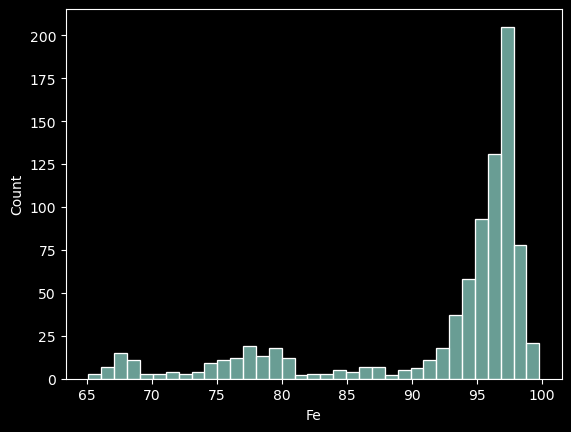

In [63]:
sns.histplot(df['Fe'])

<AxesSubplot:xlabel='Fe', ylabel='Ms'>

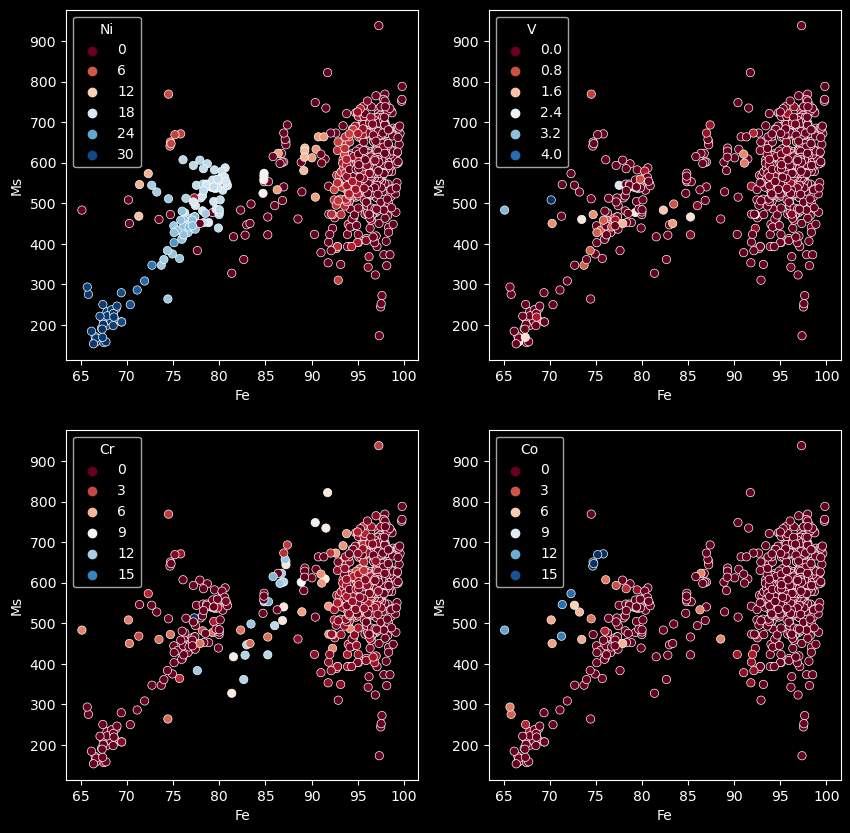

In [64]:
%matplotlib inline
# plt.style.use("default")
# plt.subplots(2,2)
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Fe', y='Ms', hue='Ni', palette="RdBu")
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Fe', y='Ms', hue='V', palette="RdBu")
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Fe', y='Ms', hue='Cr', palette="RdBu")
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='Fe', y='Ms', hue='Co', palette="RdBu")

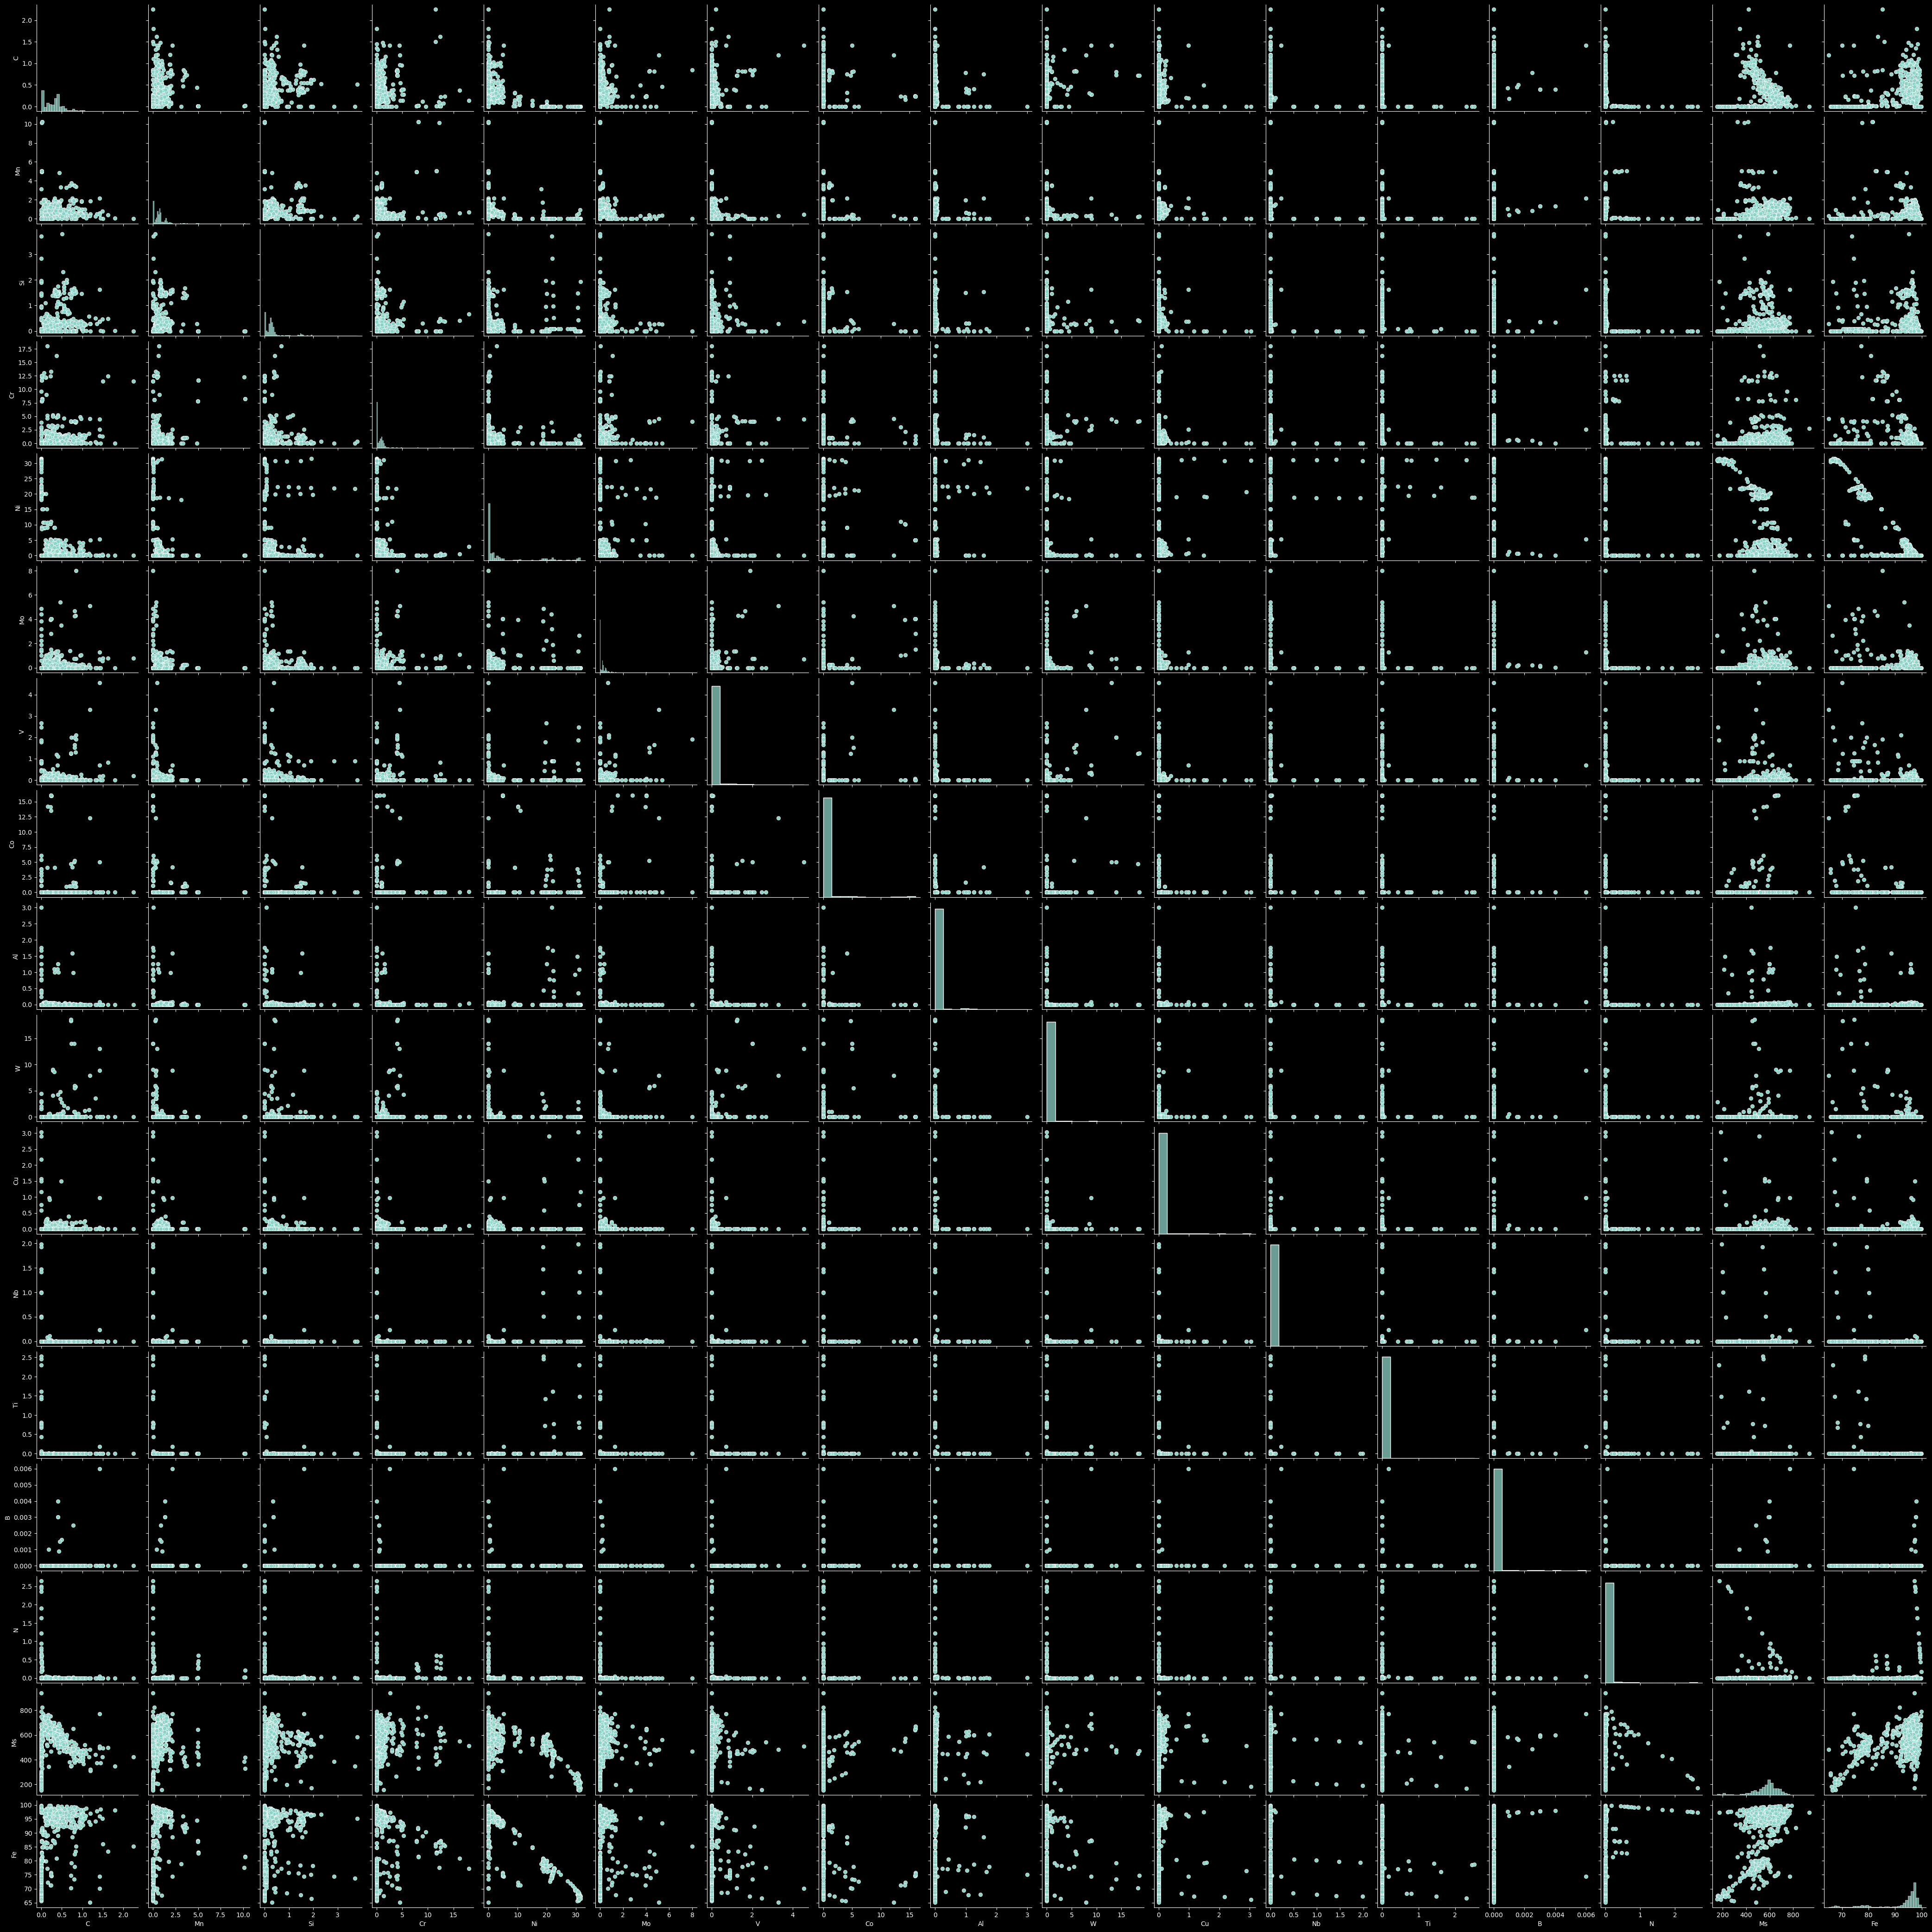

In [65]:
sns.pairplot(df)

In [16]:
df.corr()

,C,Mn,Si,Cr,Ni,Mo,V,Co,Al,W,Cu,Nb,Ti,B,N,Ms,Fe
C,1.000000,0.081386,0.194379,0.073729,-0.495122,0.089841,0.140873,0.006114,-0.082499,0.191599,-0.055651,-0.097301,-0.113753,0.113949,-0.155542,-0.101194,0.385126
Mn,0.081386,1.000000,0.139825,0.230704,-0.355320,-0.086791,-0.098567,-0.089711,-0.051116,-0.068379,-0.042588,-0.070387,-0.082673,0.062303,-0.029850,0.073802,0.227238
Si,0.194379,0.139825,1.000000,-0.041889,-0.177540,-0.015638,0.040549,-0.065072,-0.024561,-0.000580,-0.043777,-0.061708,-0.069709,0.046765,-0.098599,0.004329,0.131180
Cr,0.073729,0.230704,-0.041889,1.000000,-0.192737,0.099177,0.145680,0.015764,-0.036197,0.145593,-0.040191,-0.041859,-0.047766,-0.007549,0.051140,0.018310,-0.113528
Ni,-0.495122,-0.355320,-0.177540,-0.192737,1.000000,-0.045359,0.059788,0.067488,0.172139,-0.044323,0.145320,0.209413,0.227189,-0.031219,-0.071875,-0.638701,-0.897106
Mo,0.089841,-0.086791,-0.015638,0.099177,-0.045359,1.000000,0.288980,0.413978,-0.042519,0.117951,-0.043587,-0.033710,-0.041996,0.018430,-0.058054,0.010510,-0.152889
V,0.140873,-0.098567,0.040549,0.145680,0.059788,0.288980,1.000000,0.157797,-0.034748,0.537735,-0.021062,-0.018661,-0.023142,0.028243,-0.032683,-0.108568,-0.267939
Co,0.006114,-0.089711,-0.065072,0.015764,0.067488,0.413978,0.157797,1.000000,0.006282,0.147933,-0.027759,-0.010699,-0.015863,-0.013738,-0.021105,-0.008151,-0.307606
Al,-0.082499,-0.051116,-0.024561,-0.036197,0.172139,-0.042519,-0.034748,0.006282,1.000000,-0.020591,-0.022989,-0.013740,-0.015553,-0.004657,-0.020629,-0.088148,-0.166231
W,0.191599,-0.068379,-0.000580,0.145593,-0.044323,0.117951,0.537735,0.147933,-0.020591,1.000000,0.012443,-0.001646,-0.008587,0.125229,-0.019481,-0.049073,-0.215635


<AxesSubplot:>

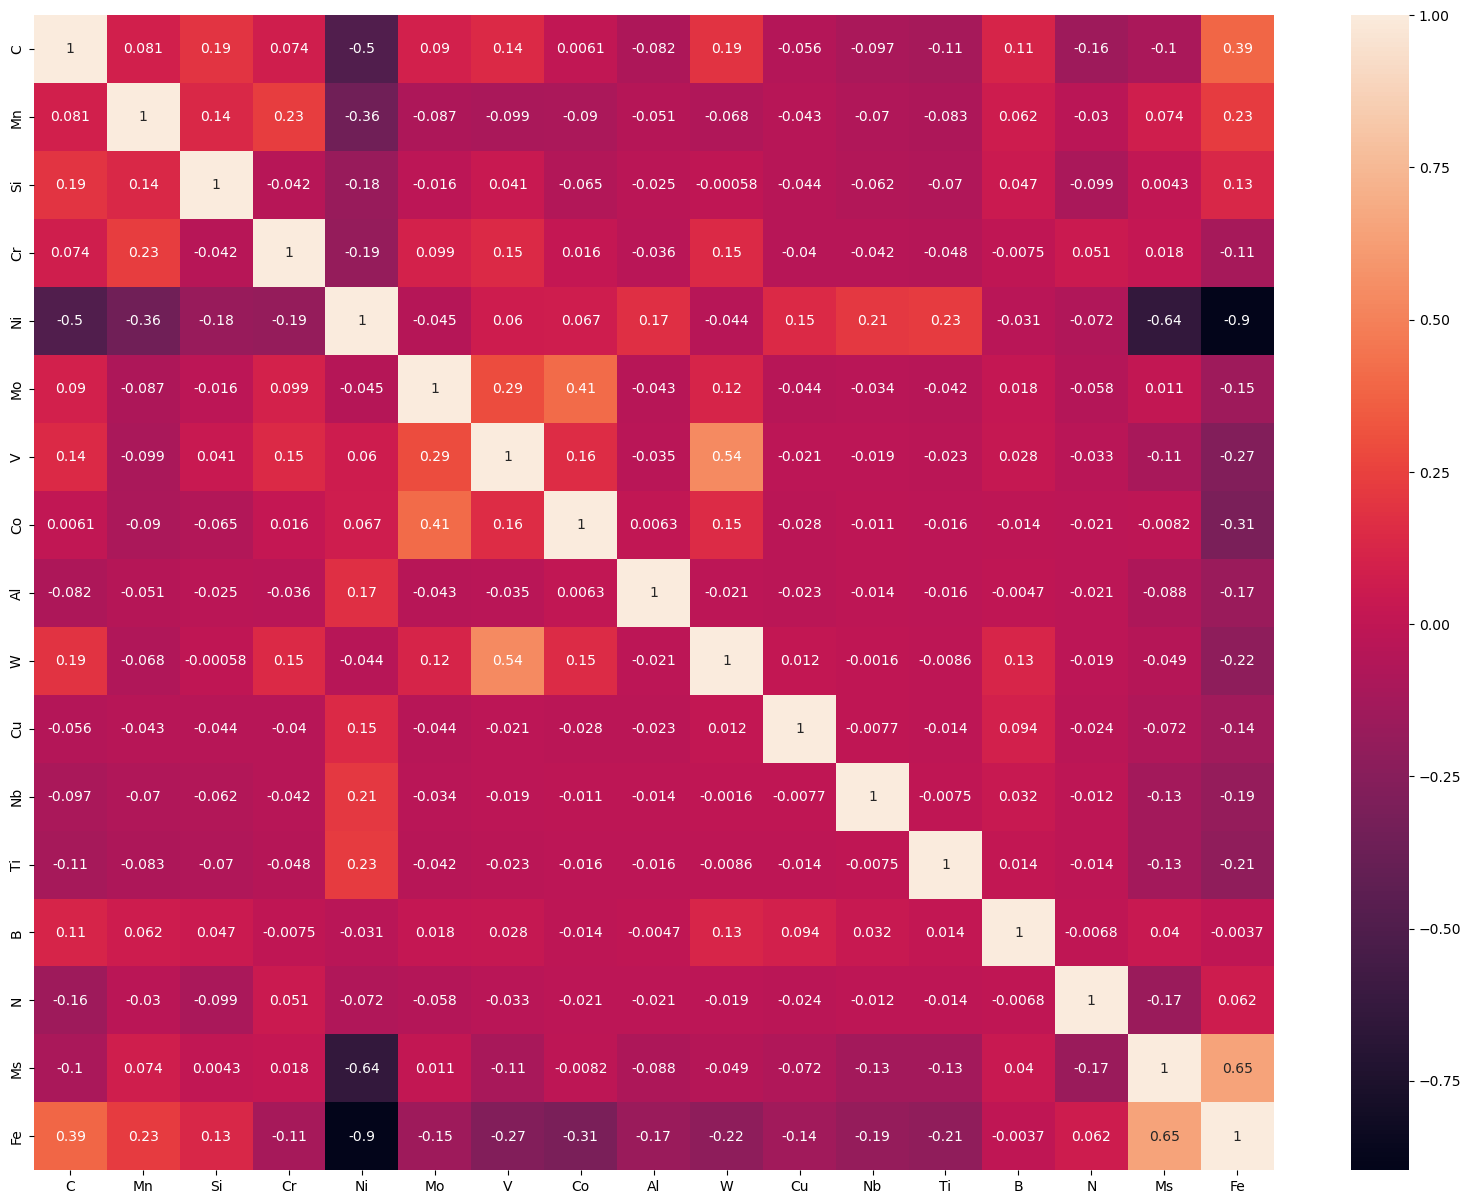

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

(-1.0, 5.0)

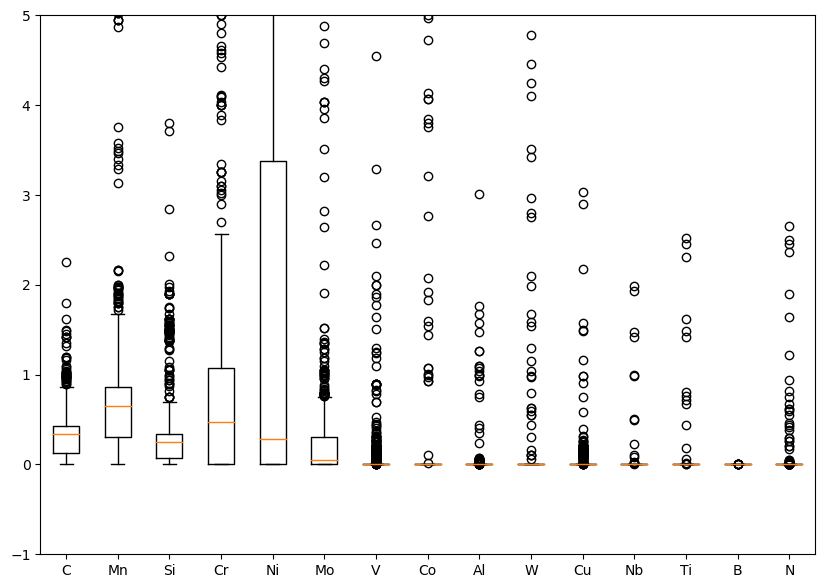

In [18]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df.drop(['Fe','Ms'],axis=1))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],df.drop(['Fe','Ms'],axis=1).columns)
plt.ylim(-1, 5)

In [75]:
x = df.drop(['Fe', 'Ms'], axis=1)
y = df['Ms']

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [77]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [78]:
# Build the Regression / Regressor models
from tqdm import tqdm_notebook
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
#modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=2)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelETR, modelGBR, modelXGR, modelRE, modelLO, modelKNN]

for models in tqdm_notebook(MM):
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    #print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    # print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    # print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    # print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    # print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    # print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    # print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    # print('Adj R Square: ', adjusted_r_squared)
    # print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------


C:\Users\Piyush Sahay\AppData\Local\Temp\ipykernel_16936\1777877186.py:39: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for models in tqdm_notebook(MM):


  0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\Piyush Sahay\AppData\Local\Temp\ipykernel_16936\1777877186.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Piyush Sahay\AppData\Local\Temp\ipykernel_16936\1777877186.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Piyush Sahay\AppData\Local\Temp\ipykernel_16936\1777877186.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Piyush Sahay\AppData\Local\Temp\ipykernel_16936\1777877186.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R

In [79]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),32.813897,0.818982,47.019369,6.728888,2210.821027,3.850560,0.822207
1,DecisionTreeRegressor(),27.472546,0.876192,38.885589,5.271039,1512.089001,3.660624,0.878398
2,"(ExtraTreeRegressor(random_state=449709742), E...",18.786727,0.927053,29.848184,3.716181,890.914069,3.396124,0.928353
3,([DecisionTreeRegressor(criterion='friedman_ms...,23.718315,0.889102,36.802526,4.709574,1354.425904,3.605566,0.891078
4,"XGBRegressor(base_score=None, booster=None, ca...",19.234230,0.925680,30.127919,3.887086,907.691516,3.405452,0.927004
5,Ridge(),34.168086,0.815344,47.489381,7.010281,2255.241345,3.860506,0.818634
6,Lasso(alpha=0.1),33.561918,0.818299,47.108026,6.884806,2219.166109,3.852443,0.821536
7,KNeighborsRegressor(n_neighbors=2),34.839119,0.797995,49.670311,6.677191,2467.139775,3.905407,0.801594


In [84]:
from sklearn.metrics import r2_score


In [85]:
modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)
y_train_pred = modelETR.predict(x_train)

In [86]:
r2_score(y_test, y_pred)

0.9239745284921405

In [27]:
out_train=pd.DataFrame({'Ms_Temp_Actual':y_train,'Ms_Temp_pred':y_train_pred})
out_test=pd.DataFrame({'Ms_Temp_Actual':y_test,'Ms_Temp_pred':y_pred})
# result=df.merge(out_train,left_index=True,right_index=True)
result = pd.concat([out_train,out_test])

In [28]:
# out_test=pd.DataFrame({'Ms_Temp_Actual':y_test,'Ms_Temp_pred':y_pred})
# result=result.merge(out_test,left_index=True,right_index=True)

In [29]:
df.shape

(843, 17)

In [30]:
result

,Ms_Temp_Actual,Ms_Temp_pred
425,477.00,477.000000
660,628.00,628.000000
417,583.00,583.000000
759,596.00,596.000000
90,573.00,573.000000
...,...,...
210,708.00,731.376667
361,673.00,693.498333
500,578.43,570.104264
558,752.00,735.200000


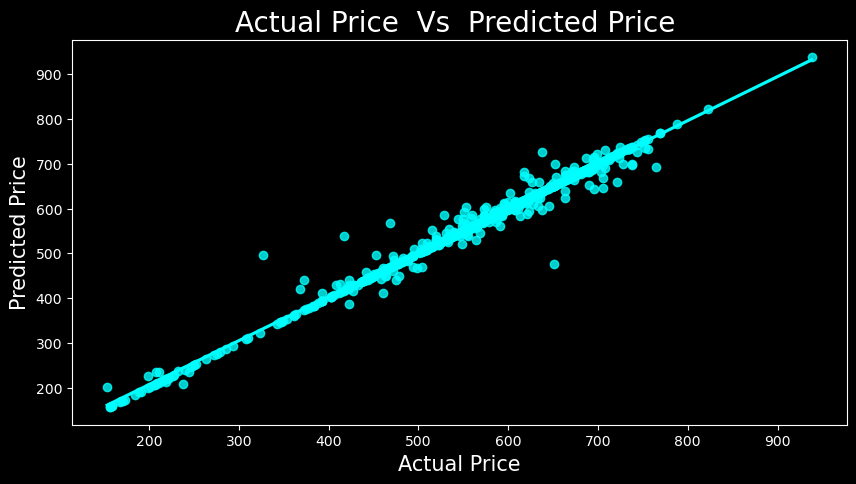

In [32]:
plt.figure(figsize=(10,5))
plt.style.use('dark_background')
sns.regplot(x='Ms_Temp_Actual',y='Ms_Temp_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

# Pickling The Model file for Deployment

In [69]:
import pickle

In [71]:
pickle.dump(modelETR, open('etrmodel.pkl','wb'))

In [72]:
pickled_model=pickle.load(open('etrmodel.pkl','rb'))

In [87]:
r2_score(y_test, pickled_model.predict(x_test))

0.9264324646645608